TITLE

Matt Ward, Byeori Kim, Seifeldin Elkemary, Chaitanya Thakral

INTRODUCTION

Heart disease, also known as cardiovascular disease, is a prevalent and potentially life-threatening condition that affects the heart and blood vessels. There are several types of heart diseases such as: heart failure, arrhythmias, valvular heart disease, and coronary artery disease, being the most common out of the four. The earlier the diagnosis of these diseases, the better the treatment becomes. Hence, our goal of this project is to be able to classify new patients on their likelihood of having a heart disease based on several risk factors that play into the possibility.
Can we determine if a new patient is at risk of heart disease based on their age, cholesterol level, resting blood pressure, and presence of chest pain? 
This question will be addressed using a dataset from Switzerland, since it has the variables of the risk factors that play in diagnosing a heart disease. The dataset has age(years), cholesterol levels(mg/dl),  resting blood pressure(mmHg), and presence of chest pain in its data of many instances of patients. 


Preliminary Exploratory Data Analysis

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [71]:
set.seed(4)
cleveland_data<-read_csv("https://raw.githubusercontent.com/byuly/dsci-100-group-project/main/processed.cleveland.data",
                col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))


cleveland_data[cleveland_data =="?"]<-NA


cleveland_tidy<-cleveland_data|>
                    mutate(diag=ifelse(is.na(num),NA,(num > 0)))|>
                    mutate(sex= as.factor(sex),cp= as.factor(cp), fbs= as.factor(fbs),restecg= as.factor(restecg),exang= as.factor(exang),thal= as.factor(thal),ca= as.factor(ca),slope= as.factor(slope))|>
                    mutate(sex= fct_recode(sex,"M" = "1", "F" = "0"))|>
                    mutate(cp= fct_recode(cp,"Typical Angina"="1", "Atypical Angina"="2","Non-Anginal Pain"="3","Asymptomatic"="4"))
                   


cleveland_split<-initial_split(cleveland_tidy,prop = 3/4, strata = num)
cleveland_testing<-training(cleveland_split)
cleveland_training<-testing(cleveland_split)
                    
cleveland_training

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
56,M,Atypical Angina,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE
57,M,Asymptomatic,140,192,0,0,148,0,0.4,2,0.0,6.0,0,FALSE
56,M,Non-Anginal Pain,130,256,1,2,142,1,0.6,2,1.0,6.0,2,TRUE
48,M,Atypical Angina,110,229,0,0,168,0,1.0,3,0.0,7.0,1,TRUE
64,M,Typical Angina,110,211,0,2,144,1,1.8,2,0.0,3.0,0,FALSE
58,F,Typical Angina,150,283,1,2,162,0,1.0,1,0.0,3.0,0,FALSE
60,M,Asymptomatic,130,206,0,2,132,1,2.4,2,2.0,7.0,4,TRUE
50,F,Non-Anginal Pain,120,219,0,0,158,0,1.6,2,0.0,3.0,0,FALSE
58,F,Non-Anginal Pain,120,340,0,0,172,0,0.0,1,0.0,3.0,0,FALSE


In [72]:
cleveland_summary<-cleveland_training|>
                     group_by(diag) |>
                     summarize(min_age = min(age), max_age = max(age),
                              min_chol = min(chol), max_chol = max(chol),
                              min_trestbps = min(trestbps), max_trestbps = max(trestbps),
                              patients = n())
cleveland_summary

diag,min_age,max_age,min_chol,max_chol,min_trestbps,max_trestbps,patients
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,35,76,175,417,101,178,42
TRUE,44,70,149,330,108,200,36


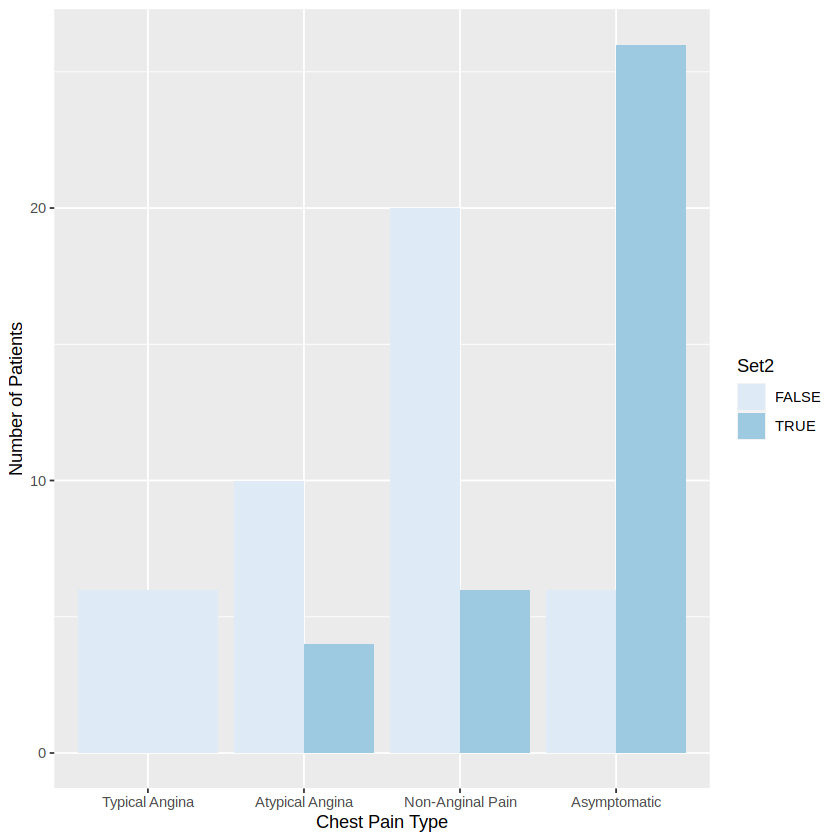

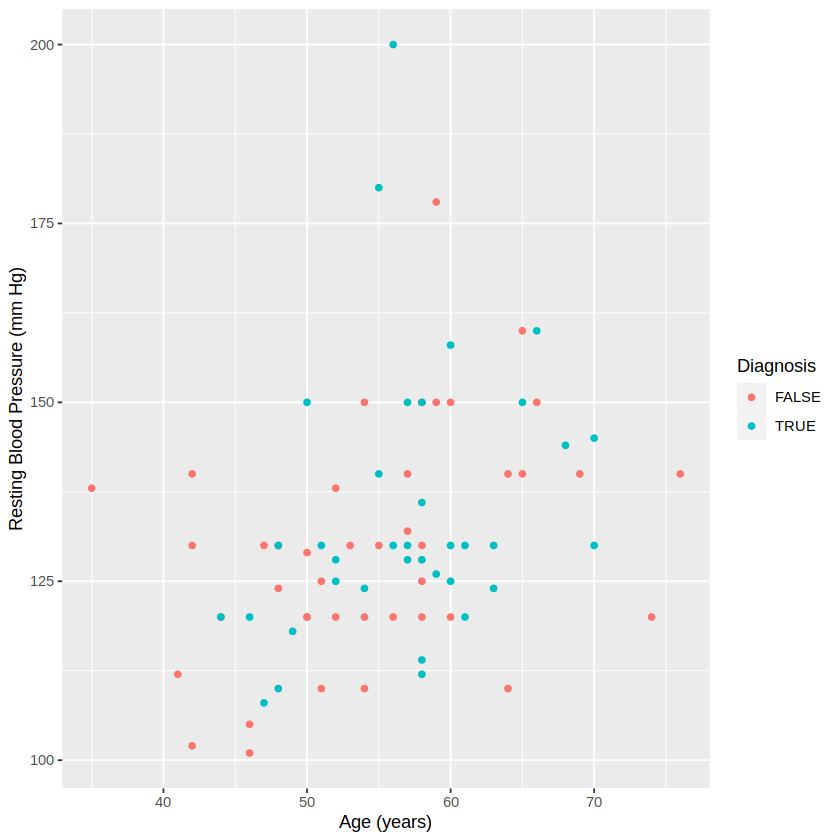

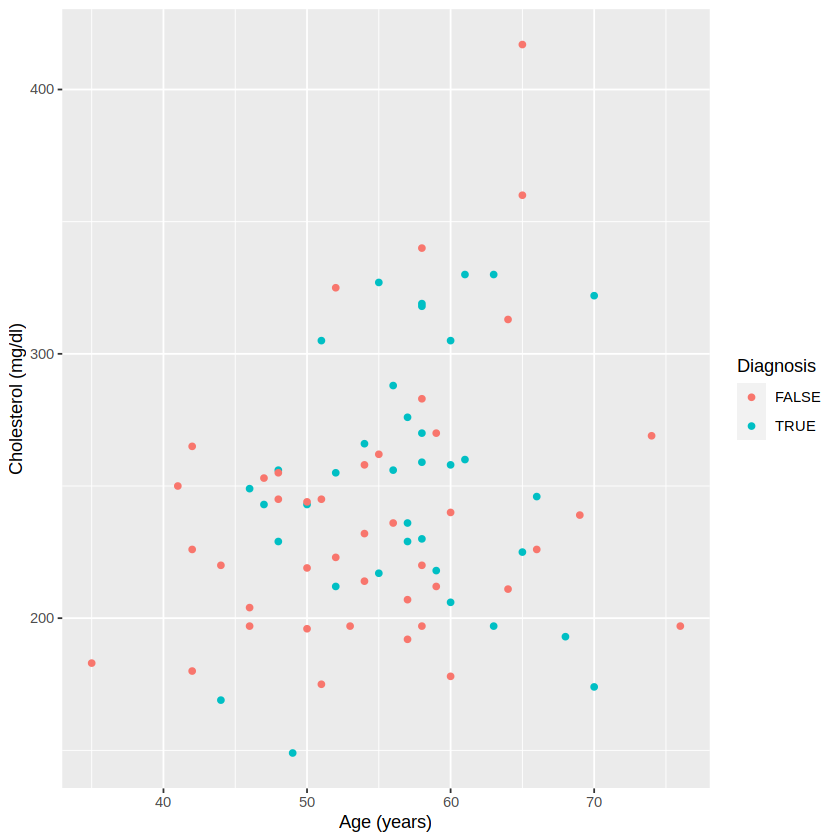

In [80]:
chest_pain_plot<- ggplot(cleveland_training, aes(x = cp, fill = diag)) +
                 geom_bar(position = "dodge") +
                 labs(x = "Chest Pain Type", y = "Number of Patients", fill = "Diagnosis") +
                 scale_fill_brewer("Set2")
resting_age_plot <- ggplot(cleveland_training, aes(x = age, y = trestbps, color = diag)) +
                 geom_point(stat= "identity") +
                  labs(x = "Age (years)", y = "Resting Blood Pressure (mm Hg)", color = "Diagnosis")  +
                 scale_fill_brewer("Set2")
cholestrol_age_plot <- ggplot(cleveland_training, aes(x = age, y = chol, color = diag)) +
                 geom_point(stat= "identity") +
                  labs(x = "Age (years)", y = "Cholesterol (mg/dl)", color = "Diagnosis")  +
                 scale_fill_brewer("Set2")
chest_pain_plot
resting_age_plot
cholestrol_age_plot